In [134]:
# Dataset 2 : Wines

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import MinMaxScaler
# model 
from sklearn.cluster import KMeans
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']





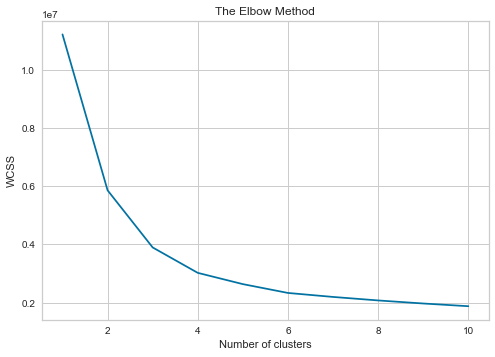

In [57]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

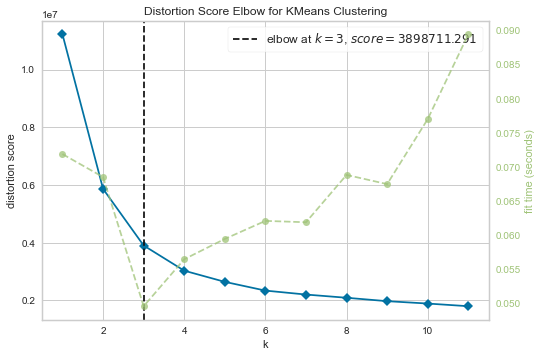

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
# Using the elbow method to find the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [59]:
# Training the K-means model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [122]:
# Visualising the clusters in with infinite features

import plotly.express as px

a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)

df['label']=kmeans.labels_
polar=df.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=400,width=700)
fig4.show()

In [61]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)
# compute an average silhouette score for all points
silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled))

# lets see what that score it
print(silhouette_score_average)

0.32027701369660505


In [62]:
# let's see each individual points
silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled))

# iterate through to find any negative values
for each_value in silhouette_score_individual:
    if each_value < 0:
        print(f'We have found a negative silhouette score: {each_value}')

We have found a negative silhouette score: -0.0035926238602060324


In [53]:
# Loop for different number of clusters

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(3,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')


 Number of Clusters: 3 | silhouette_score_average : 0.36212071318244765
 Number of Clusters: 4 | silhouette_score_average : 0.32027701369660505
 Number of Clusters: 5 | silhouette_score_average : 0.2677359514631433
 Number of Clusters: 6 | silhouette_score_average : 0.28069270029692633
 Number of Clusters: 7 | silhouette_score_average : 0.24578320422334013
 Number of Clusters: 8 | silhouette_score_average : 0.2382377158043956
 Number of Clusters: 9 | silhouette_score_average : 0.22165468614825143
 Number of Clusters: 3 | Number of Negative Values: 3
 Number of Clusters: 4 | Number of Negative Values: 1
 Number of Clusters: 5 | Number of Negative Values: 8
 Number of Clusters: 6 | Number of Negative Values: 6
 Number of Clusters: 7 | Number of Negative Values: 33
 Number of Clusters: 8 | Number of Negative Values: 25
 Number of Clusters: 9 | Number of Negative Values: 34


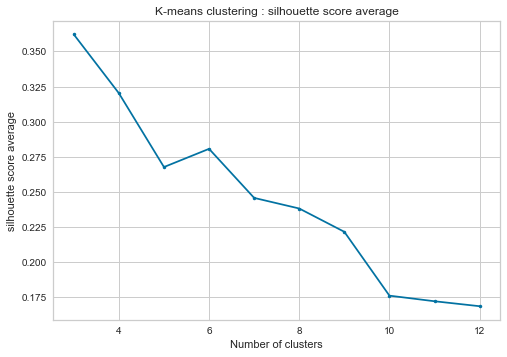

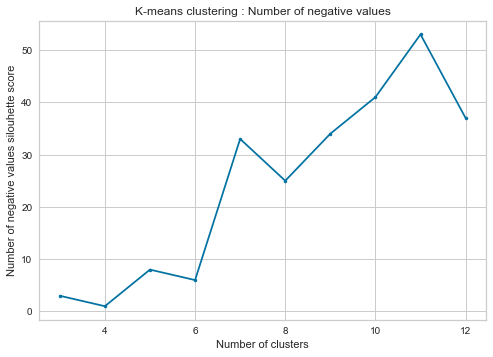

In [119]:
# Loop for different number of clusters

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# define our scaler
scaler = MinMaxScaler()
# scale down our data
df_scaled = scaler.fit_transform(df)
kmeans.fit(df_scaled)

# re-do our loop, try to find values with no negative scores, or one with the least!!
negative_values = [0 for i in range(3,13)]

silhouette_score_average_list = []

# remember, anything past 15 looked really good based on the inertia
number_of_clusters = [i for i in range(3,13)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for i in number_of_clusters:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='euclidean')
    silhouette_score_average_list.append(silhouette_score_average)
    
    # iterate through to find any negative values
    for k in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if k < 0:
            negative_values[i-3] += 1


fig1, ax1 = plt.subplots()
ax1.set_title('K-means clustering : silhouette score average')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('silhouette score average')
ax1.plot(number_of_clusters, silhouette_score_average_list, marker=".")

fig, ax = plt.subplots()
ax.set_title('K-means clustering : Number of negative values')
ax.set_xlabel('Number of clusters')
ax.set_ylabel("Number of negative values silouhette score")
ax.plot(number_of_clusters, negative_values, marker=".")

plt.show()



In [64]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score
for i in range(2,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X)

    print('v_measure_score {} :{}'.format(i,v_measure_score(y,y_pred1,beta =1.0)))
    
# print('homogeneity_score :',homogeneity_score(y,y_pred1))
# print('completeness_score :',completeness_score(y,y_pred1))

v_measure_score 2 :0.08667890113657652
v_measure_score 3 :0.5278984286066358
v_measure_score 4 :0.45645023459410133
v_measure_score 5 :0.39989570556938114
v_measure_score 6 :0.43041133055285646


time for running the algorithm = 4.89477992799948 s


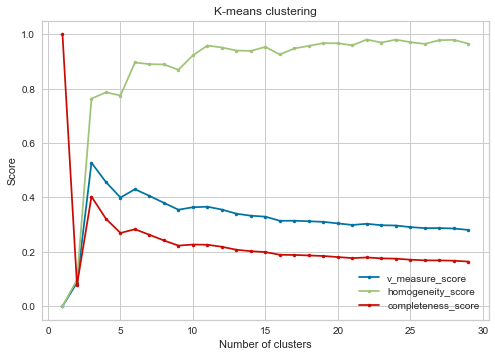

In [143]:
# score of the clustering

from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import completeness_score

v_measure_score_list = []
homogeneity_score_list = []
completeness_score_list = []

time1 = time.perf_counter()

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    y_pred1 = kmeans.fit_predict(X_scaled)

    v_measure_score_list.append(v_measure_score(y,y_pred1,beta =1.0))
    homogeneity_score_list.append(homogeneity_score(y,y_pred1))
    completeness_score_list.append(completeness_score(y,y_pred1))
    
time2 = time.perf_counter()
timeA = time2 - time1
print('time for running the algorithm =',timeA,'s')
    
number_of_clusters = [i for i in range(1,30)]
fig, ax = plt.subplots()
ax.set_title('K-means clustering')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Score')
ax.plot(number_of_clusters, v_measure_score_list, marker=".", label="v_measure_score")
ax.plot(number_of_clusters, homogeneity_score_list, marker=".", label="homogeneity_score")
ax.plot(number_of_clusters, completeness_score_list, marker=".", label="completeness_score")
ax.legend()
plt.show()

In [32]:
# Manhattan distance

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}
possible_K_values = [i for i in range(3,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='manhattan')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='manhattan')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')



 Number of Clusters: 3 | silhouette_score_average : 0.36642006818694955
 Number of Clusters: 4 | silhouette_score_average : 0.3531365155397055
 Number of Clusters: 5 | silhouette_score_average : 0.29261412961090827
 Number of Clusters: 6 | silhouette_score_average : 0.3043238648810394
 Number of Clusters: 7 | silhouette_score_average : 0.2534016206029578
 Number of Clusters: 8 | silhouette_score_average : 0.24511142439474376
 Number of Clusters: 9 | silhouette_score_average : 0.22225970380286328
 Number of Clusters: 3 | Number of Negative Values: 19
 Number of Clusters: 4 | Number of Negative Values: 4
 Number of Clusters: 5 | Number of Negative Values: 11
 Number of Clusters: 6 | Number of Negative Values: 8
 Number of Clusters: 7 | Number of Negative Values: 42
 Number of Clusters: 8 | Number of Negative Values: 27
 Number of Clusters: 9 | Number of Negative Values: 53


In [33]:
# Minkowski distance

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(3,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='minkowski')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='minkowski')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')



 Number of Clusters: 3 | silhouette_score_average : 0.3621207131832771
 Number of Clusters: 4 | silhouette_score_average : 0.3202770136975127
 Number of Clusters: 5 | silhouette_score_average : 0.267735951464051
 Number of Clusters: 6 | silhouette_score_average : 0.280692700297834
 Number of Clusters: 7 | silhouette_score_average : 0.24578320422428512
 Number of Clusters: 8 | silhouette_score_average : 0.238237715805331
 Number of Clusters: 9 | silhouette_score_average : 0.2216546861491961
 Number of Clusters: 3 | Number of Negative Values: 3
 Number of Clusters: 4 | Number of Negative Values: 1
 Number of Clusters: 5 | Number of Negative Values: 8
 Number of Clusters: 6 | Number of Negative Values: 6
 Number of Clusters: 7 | Number of Negative Values: 33
 Number of Clusters: 8 | Number of Negative Values: 25
 Number of Clusters: 9 | Number of Negative Values: 34


In [34]:
# Hamming distance

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(3,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='hamming')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='hamming')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')



 Number of Clusters: 3 | silhouette_score_average : 0.0745580304368759
 Number of Clusters: 4 | silhouette_score_average : 0.09283889650920589
 Number of Clusters: 5 | silhouette_score_average : 0.06208629381847224
 Number of Clusters: 6 | silhouette_score_average : 0.06415178185681346
 Number of Clusters: 7 | silhouette_score_average : 0.0351194091724919
 Number of Clusters: 8 | silhouette_score_average : 0.029642732949957794
 Number of Clusters: 9 | silhouette_score_average : 0.01914676555787435
 Number of Clusters: 3 | Number of Negative Values: 2
 Number of Clusters: 4 | Number of Negative Values: 6
 Number of Clusters: 5 | Number of Negative Values: 40
 Number of Clusters: 6 | Number of Negative Values: 43
 Number of Clusters: 7 | Number of Negative Values: 129
 Number of Clusters: 8 | Number of Negative Values: 146
 Number of Clusters: 9 | Number of Negative Values: 187


In [35]:
# Cosine distance

# re-do our loop, try to find values with no negative scores, or one with the least!!
bad_k_values = {}

# remember, anything past 15 looked really good based on the inertia
possible_K_values = [i for i in range(3,10)]

# we start with 1, as we can not have 0 clusters in k means
# iterate through each of our values
for each_value in possible_K_values:
    
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=each_value, init='k-means++',random_state=32)
    
    # fit it
    kmeans.fit(df_scaled)
    
    # find each silhouette score
    silhouette_score_individual = silhouette_samples(df_scaled, kmeans.predict(df_scaled),metric='cosine')
    
    # find each average silhouette score
    silhouette_score_average = silhouette_score(df_scaled, kmeans.predict(df_scaled),metric='cosine')
    print(f' Number of Clusters: {each_value} | silhouette_score_average : {silhouette_score_average}')

    # iterate through to find any negative values
    for each_silhouette in silhouette_score_individual:
        
        # if we find a negative, lets start counting them
        if each_silhouette < 0:
            
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            
            else:
                bad_k_values[each_value] += 1
            
for key, val in bad_k_values.items():
    print(f' Number of Clusters: {key} | Number of Negative Values: {val}')



 Number of Clusters: 3 | silhouette_score_average : 0.46505520711054
 Number of Clusters: 4 | silhouette_score_average : 0.49664203421102976
 Number of Clusters: 5 | silhouette_score_average : 0.42097971707552145
 Number of Clusters: 6 | silhouette_score_average : 0.44011135947035385
 Number of Clusters: 7 | silhouette_score_average : 0.39735318282197707
 Number of Clusters: 8 | silhouette_score_average : 0.38206017448327884
 Number of Clusters: 9 | silhouette_score_average : 0.3607283553941373
 Number of Clusters: 3 | Number of Negative Values: 56
 Number of Clusters: 4 | Number of Negative Values: 6
 Number of Clusters: 5 | Number of Negative Values: 10
 Number of Clusters: 6 | Number of Negative Values: 11
 Number of Clusters: 7 | Number of Negative Values: 59
 Number of Clusters: 8 | Number of Negative Values: 46
 Number of Clusters: 9 | Number of Negative Values: 55


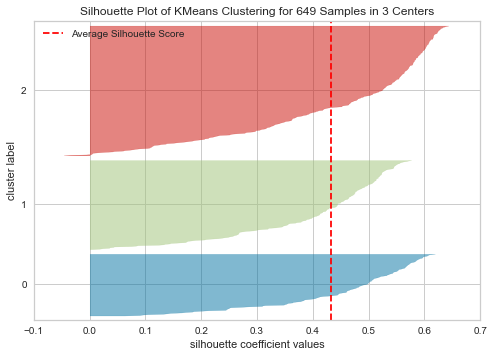

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 649 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


# Instantiate the clustering model and visualizer
model = KMeans(3, random_state=32)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

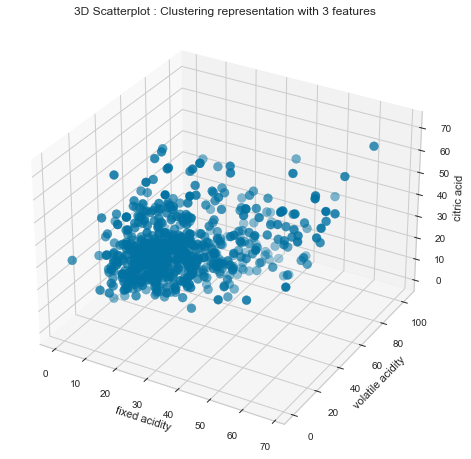

In [121]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ='3d')

sctt = ax.scatter(pd.DataFrame(df, columns =['fixed acidity']),
                    pd.DataFrame(df, columns =['volatile acidity']),
                    pd.DataFrame(df, columns =['citric acid']),
                    s=80)

plt.title("3D Scatterplot : Clustering representation with 3 features",pad = 1)
ax.set_xlabel('fixed acidity')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('citric acid')
plt.savefig('3d_scatterplot.png')

In [142]:
# Adding clustering column to the dataset

b = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df_cluster = pd.read_csv(b)
df_cluster = df_cluster.take([10*i for i in range(649)], axis = 0)
df_cluster = df_cluster.apply(LabelEncoder().fit_transform)
df_cluster.loc[:,"cluster"] = kmeans.labels_
print(df_cluster.head())

# save the data
df_cluster.to_csv('wine_quality_Kmeans.csv', index=False)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      1             22                27           35             172   
10     1             33                27           40              10   
20     1             14                80           47               6   
30     1             37                22           38             105   
40     1             19                20           38              24   

    chlorides  free sulfur dioxide  total sulfur dioxide  density  pH  \
0          29                   44                   151      365  17   
10         17                    8                    49       53  16   
20         13                   27                    59        8  50   
30         28                   18                   123      295  37   
40        101                   64                   139      140  28   

    sulphates  alcohol  quality  cluster  
0          19        4        3        1  
10         30       45        